In [23]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import PIL
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Make predictions using ready made model (without any training)

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

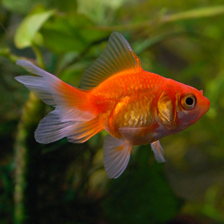

In [4]:
gold_fish = Image.open("Assets/gold_fish.png").resize(IMAGE_SHAPE)
gold_fish

In [5]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [6]:
gold_fish[np.newaxis, ...]

array([[[[0.28235294, 0.33333333, 0.07058824],
         [0.31372549, 0.37254902, 0.09019608],
         [0.34901961, 0.41960784, 0.11764706],
         ...,
         [0.32941176, 0.39215686, 0.00392157],
         [0.32156863, 0.38431373, 0.00392157],
         [0.30980392, 0.36862745, 0.        ]],

        [[0.28627451, 0.33333333, 0.08235294],
         [0.3254902 , 0.38039216, 0.10980392],
         [0.35294118, 0.42352941, 0.12941176],
         ...,
         [0.32156863, 0.38039216, 0.00392157],
         [0.31372549, 0.37254902, 0.00392157],
         [0.30196078, 0.36078431, 0.        ]],

        [[0.28627451, 0.33333333, 0.08627451],
         [0.31372549, 0.36862745, 0.10196078],
         [0.34509804, 0.41568627, 0.12941176],
         ...,
         [0.31764706, 0.37647059, 0.00392157],
         [0.30980392, 0.36862745, 0.00784314],
         [0.29803922, 0.35686275, 0.00392157]],

        ...,

        [[0.05490196, 0.10980392, 0.01568627],
         [0.05098039, 0.11372549, 0.01960784]

In [7]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 8s 8s/step


(1, 1001)

In [8]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [14]:
tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [15]:
image_labels[predicted_label_index]

'goldfish'

In [16]:
# Load flowers dataset

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)
# cache_dir indicates where to download data. I specified . which means current directory
# untar true will unzip it

228813984/228813984 [==============================] - 11s 0us/step


In [17]:
data_dir

'./datasets/flower_photos'

In [18]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [19]:
list(data_dir.glob('*/*.jpg'))[:5]

[PosixPath('datasets/flower_photos/sunflowers/4933230161_12f3ee7587.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/14741907467_fab96f3b2b_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/7728953426_abd179ab63.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/6482016425_d8fab362f6.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/1379256773_bb2eb0d95b_n.jpg')]

In [20]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [21]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/2863863372_605e29c03e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5840476802_dfa40deb1f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5990626258_697f007308_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14414117598_cf70df30de.jpg'),
 PosixPath('datasets/flower_photos/roses/3236806990_a90c7bb520_m.jpg')]

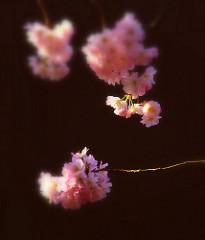

In [24]:
PIL.Image.open(str(roses[1]))

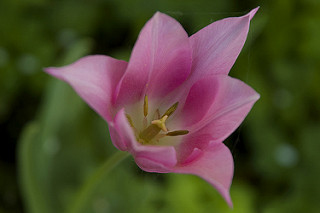

In [25]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [27]:
# Read flowers images from disk into numpy array using opencv

flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),}

In [28]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [29]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/2863863372_605e29c03e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5840476802_dfa40deb1f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5990626258_697f007308_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14414117598_cf70df30de.jpg'),
 PosixPath('datasets/flower_photos/roses/3236806990_a90c7bb520_m.jpg')]

In [30]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/2863863372_605e29c03e_m.jpg'

In [31]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 180, 3)

In [32]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [33]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

X = np.array(X)
y = np.array(y)

In [34]:
# Train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
# Scale images

X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

Make prediction using pre-trained model on new flowers dataset

In [36]:
X[0].shape

(224, 224, 3)

In [37]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [38]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

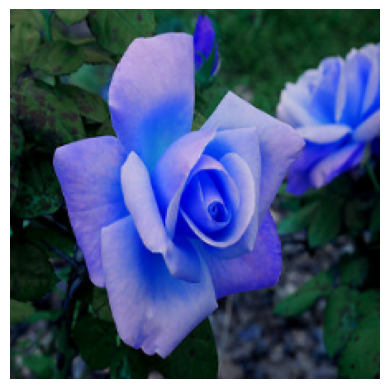

In [44]:
plt.axis('off')
plt.imshow(X[10])

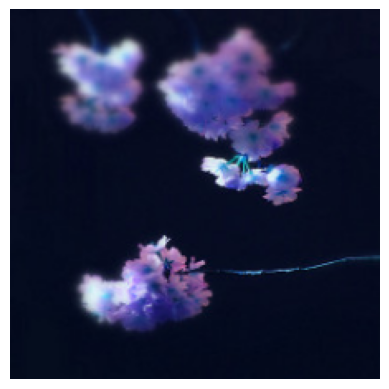

In [40]:
plt.axis('off')
plt.imshow(X[1])

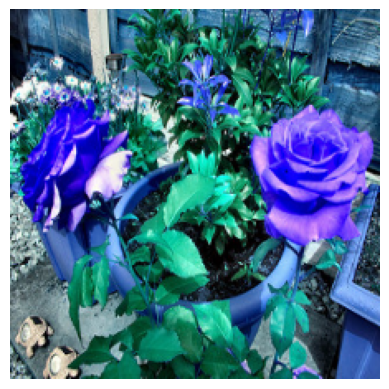

In [41]:
plt.axis('off')
plt.imshow(X[2])

In [42]:
predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted

1/1 [==============================] - 1s 887ms/step


array([722, 722, 722])

In [43]:
image_labels[795]

'shower curtain'

In [45]:
# Now take pre-trained model and retrain it using flowers images

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [46]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [47]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 9s 39ms/step - loss: 0.7913 - acc: 0.7013
Epoch 2/5
86/86 [==============================] - 3s 39ms/step - loss: 0.4068 - acc: 0.8572
Epoch 3/5
86/86 [==============================] - 4s 42ms/step - loss: 0.3220 - acc: 0.8914
Epoch 4/5
86/86 [==============================] - 3s 41ms/step - loss: 0.2673 - acc: 0.9190
Epoch 5/5
86/86 [==============================] - 3s 39ms/step - loss: 0.2344 - acc: 0.9281


In [49]:
acc = model.evaluate(X_test_scaled,y_test)[1]

print("Accuray : ", round(acc * 100, 3), "%")

29/29 [==============================] - 2s 43ms/step - loss: 0.3757 - acc: 0.8769
Accuray :  87.691 %
